<a href="https://colab.research.google.com/github/denistoo749/Students-Performance-Dataset/blob/main/students_performance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Students Performance Dataset
**1. Problem**
- This dataset offers a comprehensive view of the factors influencing students' academic performance, making it ideal for educational research, development of predictive models, and statistical analysis.

**2. Data**
- This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GradeClass, classifies students' grades into distinct categories, providing a robust dataset for educational research, predictive modeling, and statistical analysis.

>https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data

**3. Features**

**Student ID**
- StudentID: A unique identifier assigned to each student (1001 to 3392).

**Demographic Details**
- Age: The age of the students ranges from 15 to 18 years.
- Gender: Gender of the students, where 0 represents Male and 1 represents Female.
- Ethnicity: The ethnicity of the students, coded as follows:
  - 0: Caucasian
  - 1: African American
  - 2: Asian
  - 3: Other
- ParentalEducation: The education level of the parents, coded as follows:
  - 0: None
  - 1: High School
  - 2: Some College
  - 3: Bachelor's
  - 4: Higher

**Study Habits**
- StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
- Absences: Number of absences during the school year, ranging from 0 to 30.
- Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

**Parental Involvement**
- ParentalSupport: The level of parental support, coded as follows:
  - 0: None
  - 1: Low
  - 2: Moderate
  - 3: High
  - 4: Very High

**Extracurricular Activities**
- Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
- Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
- Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

**Academic Performance**
- GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

**Target Variable: Grade Class**
- GradeClass: Classification of students' grades based on GPA:
  - 0: 'A' (GPA >= 3.5)
  - 1: 'B' (3.0 <= GPA < 3.5)
  - 2: 'C' (2.5 <= GPA < 3.0)
  - 3: 'D' (2.0 <= GPA < 2.5)
  - 4: 'F' (GPA < 2.0)

# Setup

In [38]:
# Import necessary tools
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [39]:
# Unzip file
!unzip '/content/drive/MyDrive/Students Performance Dataset/archive.zip' -d '/content/drive/MyDrive/Students Performance Dataset/data/'

Archive:  /content/drive/MyDrive/Students Performance Dataset/archive.zip
  inflating: /content/drive/MyDrive/Students Performance Dataset/data/Student_performance_data _.csv  


In [40]:
df = pd.read_csv('/content/drive/MyDrive/Students Performance Dataset/data/Student_performance_data _.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [41]:
df['GradeClass'].unique()

array([2., 1., 4., 3., 0.])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [43]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [44]:
# Make a correlation matrix
df.corr()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


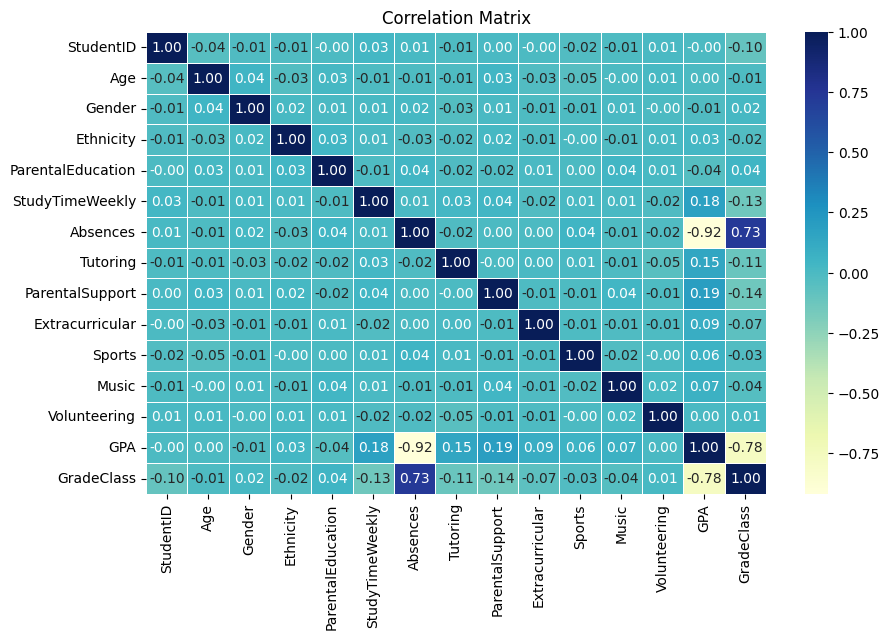

In [45]:
# Visualize correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f',cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show();

# Data Preprocessing

In [46]:
# Encode target variable
# grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4}
# df['GradeClass'] = df['GradeClass'].map(grade_mapping)

# Ensure the target variable is of type integer
df['GradeClass'] = df['GradeClass'].astype(int)

In [47]:
# Split features and target variable
x = df.drop('GradeClass', axis=1)
y = df['GradeClass']

In [48]:
# Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1913, 14), (479, 14), (1913,), (479,))

In [49]:
# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Modelling

In [50]:
# Set the random seed
np.random.seed(42)

# Put the models in dictionary
models = {'Logistic Regression': LogisticRegression(),
          'Random Forest Classifier': RandomForestClassifier()}

# Function to fit and score the model
def fit_and_score(models, x_train, x_test, y_train, y_test):
  # Make a dictionary to keep model scores
  model_scores ={}
  for name, model in models.items():
    model.fit(x_train, y_train)
    model.score(x_test, y_test)

    model_scores[name] = model.score(x_test, y_test)

  return model_scores

In [51]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.697286012526096,
 'Random Forest Classifier': 0.9123173277661796}

In [52]:
y_pred = models['Random Forest Classifier'].predict(x_test)

In [53]:
# Model evaluation
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 10   5   3   2   2]
 [  0  43   3   1   2]
 [  0   5  74   5   1]
 [  0   2   2  77   5]
 [  1   1   1   1 233]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.45      0.61        22
           1       0.77      0.88      0.82        49
           2       0.89      0.87      0.88        85
           3       0.90      0.90      0.90        86
           4       0.96      0.98      0.97       237

    accuracy                           0.91       479
   macro avg       0.88      0.82      0.83       479
weighted avg       0.91      0.91      0.91       479

Accuracy: 0.9123173277661796


# Plot ROC curve and calculate AUC metric

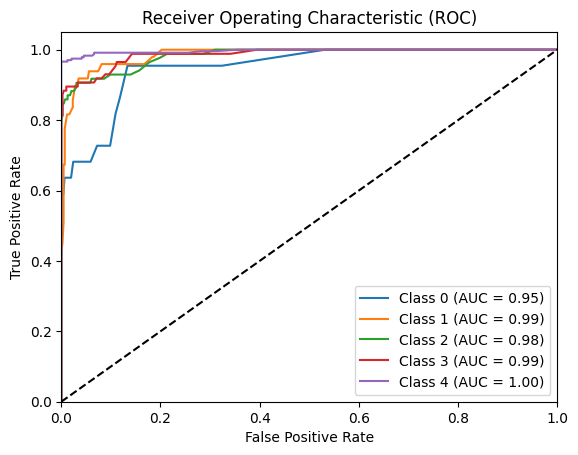

In [58]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multiclass ROC curve
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Plot ROC curve for each class
plt.figure()
for i in range(y_test_binarized.shape[1]):
    # Get predicted probabilities for the current class
    y_score = models['Random Forest Classifier'].predict_proba(x_test)[:, i]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

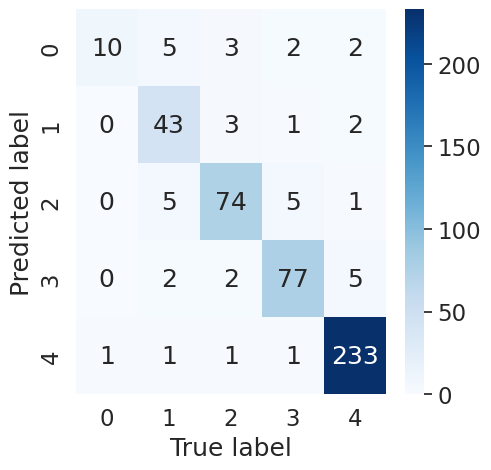

In [76]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_pred):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True,
                     fmt='d',
                     cmap='Blues')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    bottom, top = ax.get_ylim()

plot_conf_mat(y_test, y_pred)

# Classification report

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.45      0.61        22
           1       0.77      0.88      0.82        49
           2       0.89      0.87      0.88        85
           3       0.90      0.90      0.90        86
           4       0.96      0.98      0.97       237

    accuracy                           0.91       479
   macro avg       0.88      0.82      0.83       479
weighted avg       0.91      0.91      0.91       479

